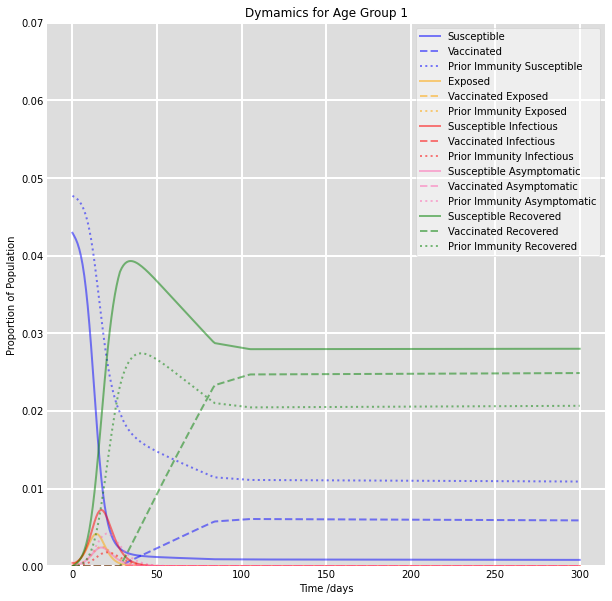

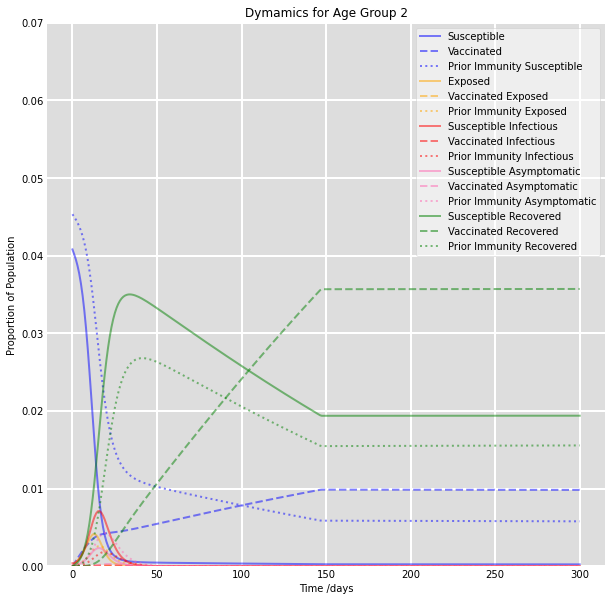

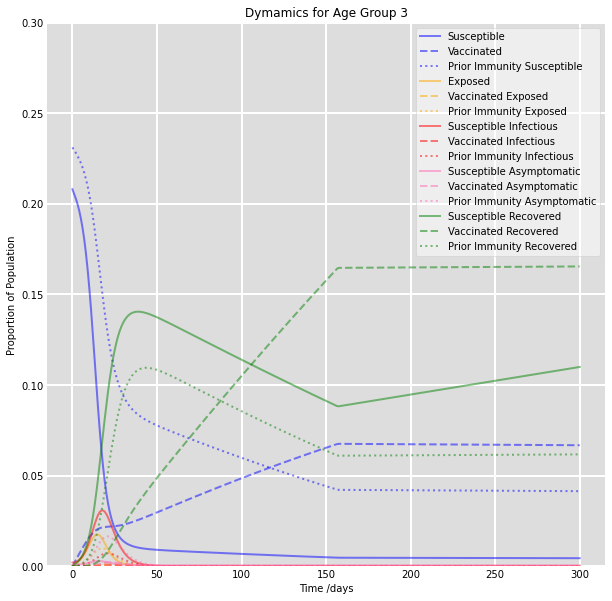

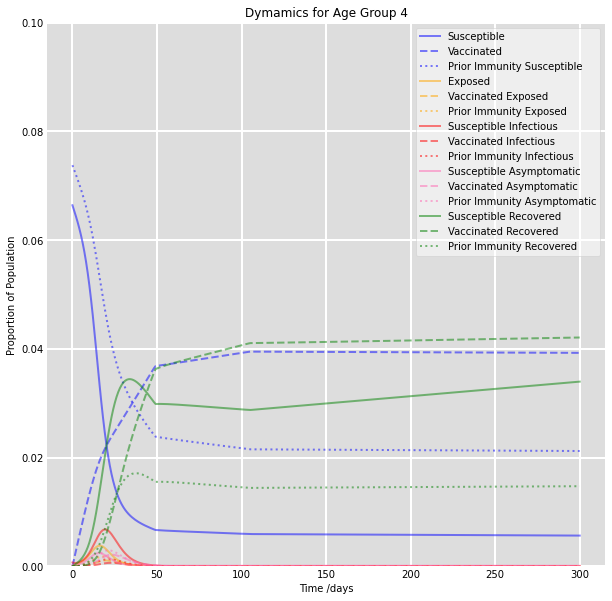

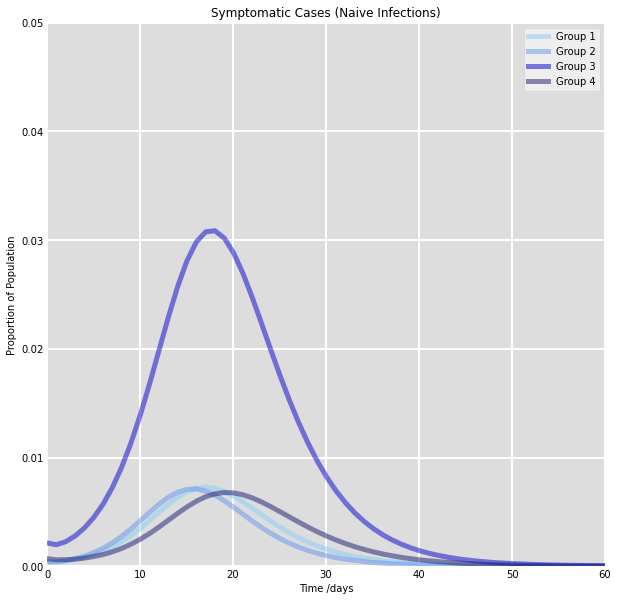

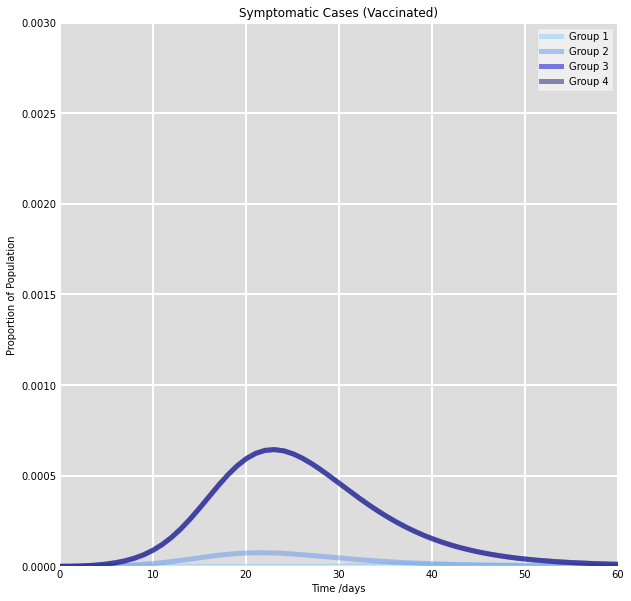

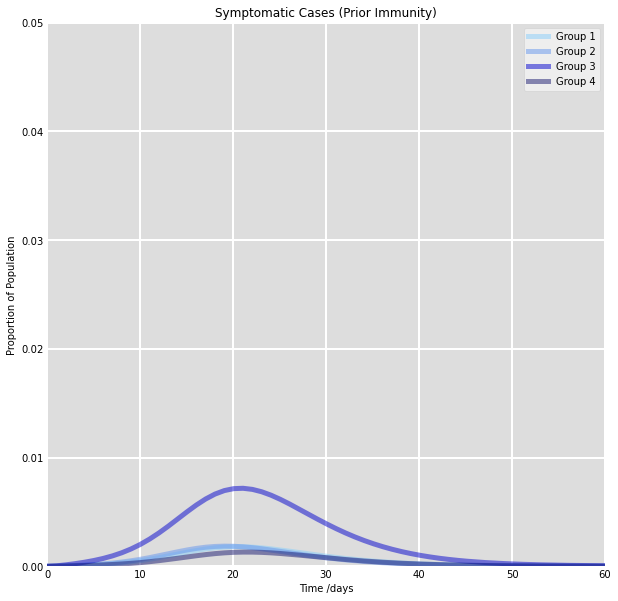

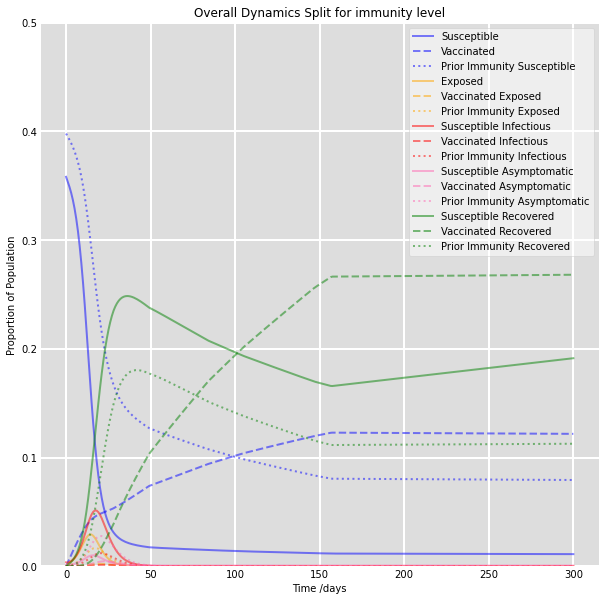

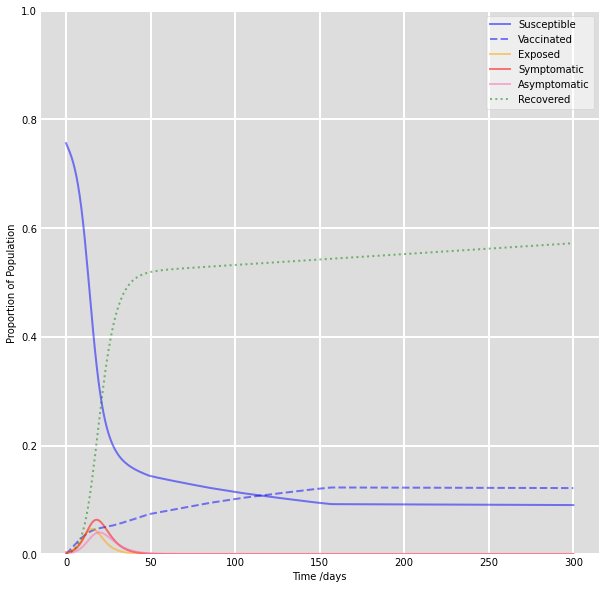

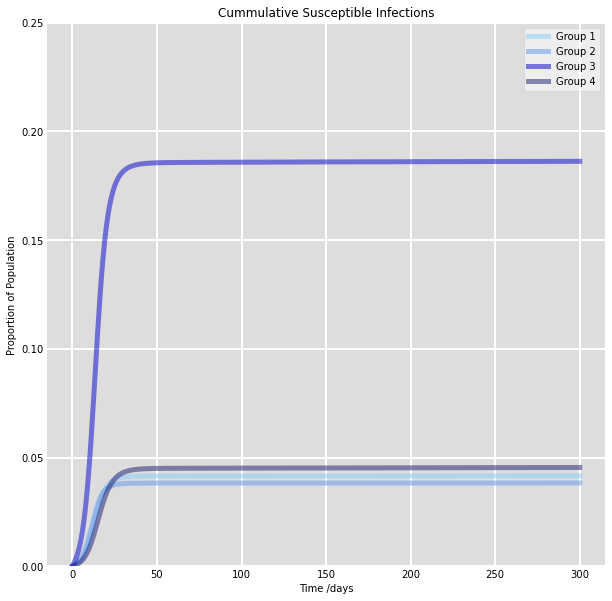

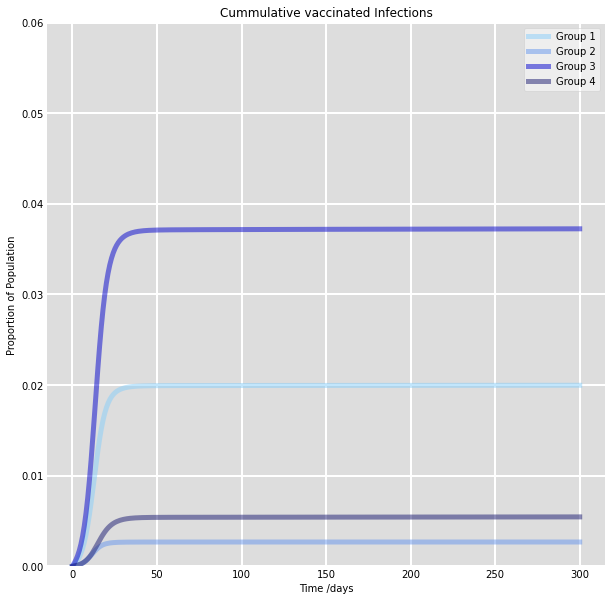

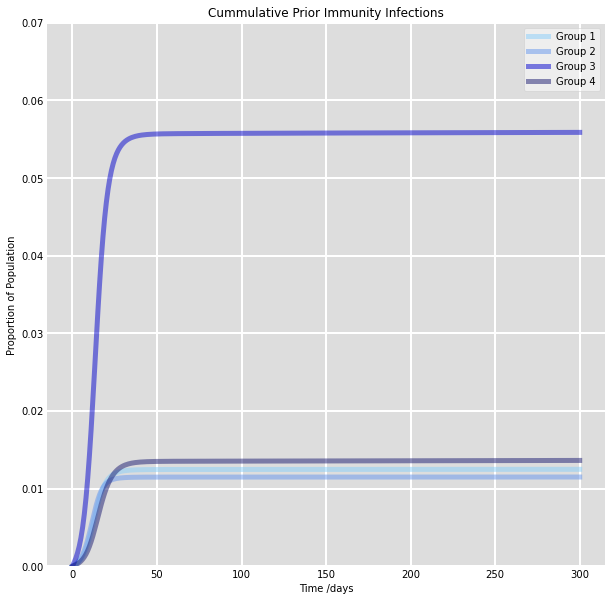

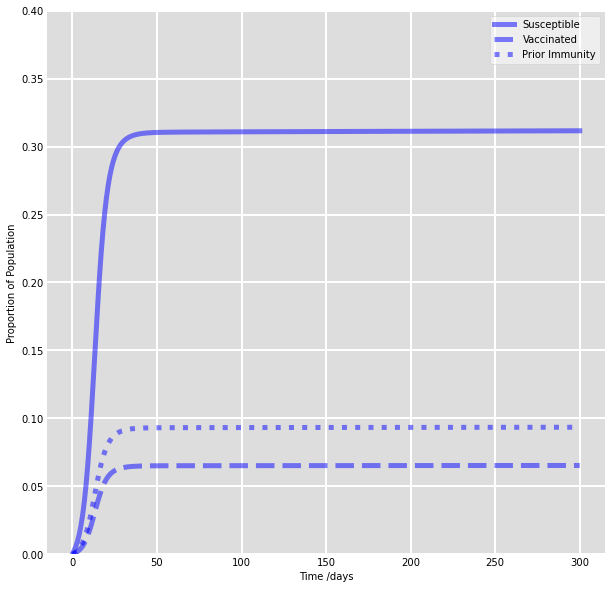

No handles with labels found to put in legend.


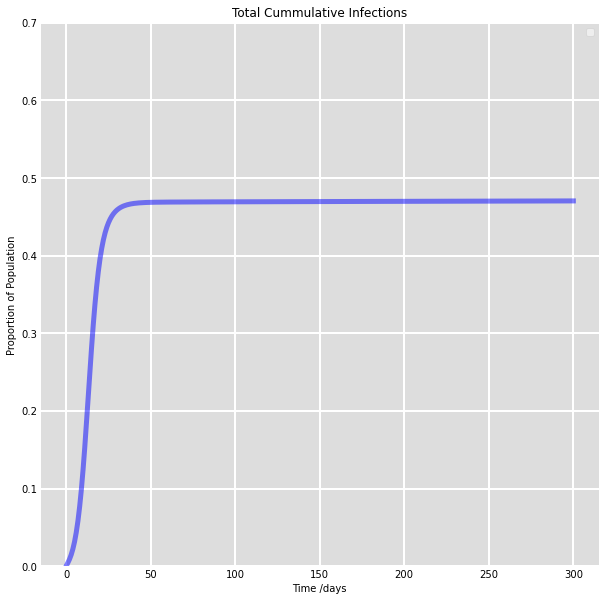

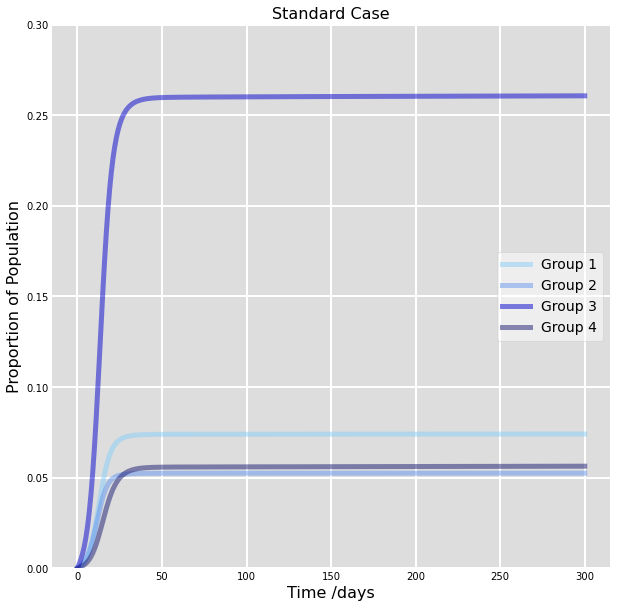

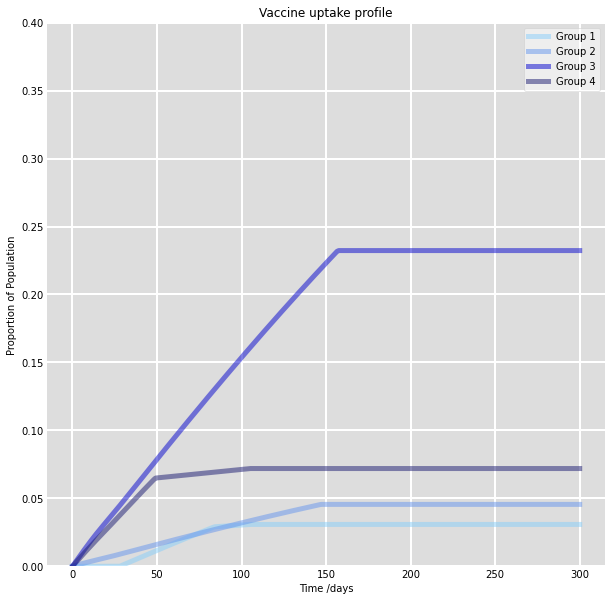

2781660.7282991246
2560680.1919917846
12445436.893628575
3036334.4541566456
1335197.1495835762
179247.61343942466
2489087.378725727
364360.1344987962
834498.2184897362
768204.0575975344
3733631.0680885827
910900.3362469892


In [2]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# N is the sum of all the age compartments

N1 = 8010000
N2 = 7610000
N3 = 38810000
N4 = 12390000
N = N1 + N2 + N3 + N4

# Initial number of all compartment

# Exposed

E_s10 = 0
E_s20 = 0
E_s30 = 0
E_s40 = 0

E_v10 = 0
E_v20 = 0
E_v30 = 0
E_v40 = 0

E_i10 = 0
E_i20 = 0
E_i30 = 0
E_i40 = 0

#Symptomatic Infections 

I_s10 = 29700
I_s20 = 27225
I_s30 = 143550
I_s40 = 47025

I_v10 = 0
I_v20 = 0
I_v30 = 0
I_v40 = 0

I_i10 = 0
I_i20 = 0
I_i30 = 0
I_i40 = 0

#Asymptomatic Infections 

A_s10 = 9900
A_s20 = 9075
A_s30 = 47850
A_s40 = 15675

A_v10 = 0
A_v20 = 0
A_v30 = 0
A_v40 = 0

A_i10 = 0
A_i20 = 0
A_i30 = 0
A_i40 = 0

#Recovered 

R_s10 = 0
R_s20 = 0
R_s30 = 0
R_s40 = 0

R_v10 = 0
R_v20 = 0
R_v30 = 0
R_v40 = 0

R_i10 = 0
R_i20 = 0
R_i30 = 0
R_i40 = 0

# Susceptibles 
V10 = 0
V20 = 0
V30 = 0
V40 = 0

S_i10 = 3188160
S_i20 = 3029480
S_i30 = 15447440
S_i40 = 4930920

S10 = (N1 - V10 - S_i10 - E_s10 - E_v10 - E_i10 - I_s10 - I_v10 - I_i10 - A_s10 - A_v10 - A_i10 - R_s10 - R_v10 - R_i10) * 0.6
S20 = (N2 - V20 - S_i20 - E_s20 - E_v20 - E_i20 - I_s20 - I_v20 - I_i20 - A_s20 - A_v20 - A_i20 - R_s20 - R_v20 - R_i20) * 0.6
S30 = (N3 - V30 - S_i30 - E_s30 - E_v30 - E_i30 - I_s30 - I_v30 - I_i30 - A_s30 - A_v30 - A_i30 - R_s30 - R_v30 - R_i30) * 0.6
S40 = (N4 - V40 - S_i40 - E_s40 - E_v40 - E_i40 - I_s40 - I_v40 - I_i40 - A_s40 - A_v40 - A_i40 - R_s40 - R_v40 - R_i40) * 0.6

#Cummulative Innitial Conditions
C_s10 = 0
C_s20 = 0
C_s30 = 0
C_s40 = 0
C_v10 = 0
C_v20 = 0
C_v30 = 0
C_v40 = 0
C_i10 = 0
C_i20 = 0
C_i30 = 0
C_i40 = 0
C_s0 = 0
C_v0 = 0
C_i0 = 0
C0 = 0

# Vaccination profile 
V_overall10 = 0 
V_overall20 = 0
V_overall30 = 0
V_overall40 = 0

# Definitions of parameters
# Contact Rates
beta11 = 0.98
beta12 = 0.25
beta13 = 1.1
beta14 = 0.096
beta21 = 0.22
beta22 = 1.5
beta23 = 1.1
beta24 = 0.15
beta31 = 0.21
beta32 = 0.24
beta33 = 1.5
beta34 = 0.2
beta41 = 0.069
beta42 = 0.12
beta43 = 0.74
beta44 = 0.36

kappa = 0.71
alpha = 0.26
eta = 0.26
delta_i = 1
delta_v = 1
delta_a = 0.2
s_i = 0.3
p = 0.75
q = 0.25
l = 0.3

#Vaccine Efficacy
s_v1 = 0.48
s_v2 = 0.07
s_v3 = 0.20
s_v4 = 0.12

def epsilon1(t, V1, E_v1, I_v1, A_v1, R_v1, N1):
    if V1 + E_v1 + I_v1 + A_v1 + R_v1 > 0.4 * N1:
        return 0
    elif 0 < t <= 28:
        return 0 
    elif 28 < t <= 84:
        return 0.006 * N1 / (N1 - (V1 + E_v1 + I_v1 + A_v1 + R_v1))
    elif 84 < t <= 105:
        return 0.001 * N1 / (N1 - (V1 + E_v1 + I_v1 + A_v1 + R_v1))
    else:
        return 0 
    
def epsilon2(t, V2, E_v2, I_v2, A_v2, R_v2, N2):
    return 0.004 * N2 / (N2 - (V2 + E_v2 + I_v2 + A_v2 + R_v2)) if V2 + E_v2 + I_v2 + A_v2 + R_v2 < 0.4 * N2 else 0

def epsilon3(t, V3, E_v3, I_v3, A_v3, R_v3, N3):
        return 0.004 * N3 / (N3 - (V3 + E_v3 + I_v3 + A_v3 + R_v3)) if V3 + E_v3 + I_v3 + A_v3 + R_v3 < 0.4 * N3 else 0

def epsilon4(t, V4, E_v4, I_v4, A_v4, R_v4, N4):
    if V4 + E_v4 + I_v4 + A_v4 + R_v4 > 0.714 * N4:
        return 0
    elif t <= 49:
        return 0.01 * N4 / (N4 - (V4 + E_v4 + I_v4 + A_v4 + R_v4))
    elif 49 < t <= 105:
        return 0.001 * N4 / (N4 - (V4 + E_v4 + I_v4 + A_v4 + R_v4))
    else:
        return 0
    
# A grid of time points (in days)
t = np.linspace(0, 300, 300)

# The SIR model differential equations.
def deriv(y, t, N, beta11, beta12, beta13, beta14, beta21, beta22, beta23, beta24, beta31, beta32, beta33, beta34, beta41, beta42, beta43, beta44, kappa, alpha, epsilon1, epsilon2, epsilon3, epsilon4, eta, delta_i, delta_v, delta_a, s_i, s_v1, s_v2, s_v3, s_v4, p, q, l):
    S1, S2, S3, S4, V1, V2, V3, V4, S_i1, S_i2, S_i3, S_i4, E_s1, E_s2, E_s3, E_s4, E_v1, E_v2, E_v3, E_v4, E_i1, E_i2, E_i3, E_i4, I_s1, I_s2, I_s3, I_s4, I_v1, I_v2, I_v3, I_v4, I_i1, I_i2, I_i3, I_i4, A_s1, A_s2, A_s3, A_s4, A_v1, A_v2, A_v3, A_v4, A_i1, A_i2, A_i3, A_i4, R_s1, R_s2, R_s3, R_s4, R_v1, R_v2, R_v3, R_v4, R_i1, R_i2, R_i3, R_i4, C_s1, C_s2, C_s3, C_s4, C_i1, C_i2, C_i3, C_i4, C_v1, C_v2, C_v3, C_v4, C_s, C_v, C_i, C, dV_overall1dt, dV_overall2dt, dV_overall3dt, dV_overall4dt = y
    Lambda1 = beta11 * (I_s1 + delta_a * A_s1 + delta_v * delta_a * A_v1 + delta_v * I_v1 + delta_i * I_i1 + delta_a * delta_i * A_i1)/N1 + beta12 * (I_s2 + delta_a * A_s2 + delta_v * delta_a * A_v2 + delta_v * I_v2 + delta_i * I_i2 + delta_a * delta_i * A_i2)/N2 + beta13 * (I_s3 + delta_a * A_s3 + delta_v * delta_a * A_v3 + delta_v * I_v3 + delta_i * I_i3 + delta_a * delta_i * A_i3)/N3 + beta14 * (I_s4 + delta_a * A_s4 + delta_v * delta_a * A_v4 + delta_v * I_v4 + delta_i * I_i4 + delta_a * delta_i * A_i4)/N4
    Lambda2 = beta21 * (I_s1 + delta_a * A_s1 + delta_v * delta_a * A_v1 + delta_v * I_v1 + delta_i * I_i1 + delta_a * delta_i * A_i1)/N1 + beta22 * (I_s2 + delta_a * A_s2 + delta_v * delta_a * A_v2 + delta_v * I_v2 + delta_i * I_i2 + delta_a * delta_i * A_i2)/N2 + beta23 * (I_s3 + delta_a * A_s3 + delta_v * delta_a * A_v3 + delta_v * I_v3 + delta_i * I_i3 + delta_a * delta_i * A_i3)/N3 + beta24 * (I_s4 + delta_a * A_s4 + delta_v * delta_a * A_v4 + delta_v * I_v4 + delta_i * I_i4 + delta_a * delta_i * A_i4)/N4
    Lambda3 = beta31 * (I_s1 + delta_a * A_s1 + delta_v * delta_a * A_v1 + delta_v * I_v1 + delta_i * I_i1 + delta_a * delta_i * A_i1)/N1 + beta32 * (I_s2 + delta_a * A_s2 + delta_v * delta_a * A_v2 + delta_v * I_v2 + delta_i * I_i2 + delta_a * delta_i * A_i2)/N2 + beta33 * (I_s3 + delta_a * A_s3 + delta_v * delta_a * A_v3 + delta_v * I_v3 + delta_i * I_i3 + delta_a * delta_i * A_i3)/N3 + beta34 * (I_s4 + delta_a * A_s4 + delta_v * delta_a * A_v4 + delta_v * I_v4 + delta_i * I_i4 + delta_a * delta_i * A_i4)/N4
    Lambda4 = beta41 * (I_s1 + delta_a * A_s1 + delta_v * delta_a * A_v1 + delta_v * I_v1 + delta_i * I_i1 + delta_a * delta_i * A_i1)/N1 + beta42 * (I_s2 + delta_a * A_s2 + delta_v * delta_a * A_v2 + delta_v * I_v2 + delta_i * I_i2 + delta_a * delta_i * A_i2)/N2 + beta43 * (I_s3 + delta_a * A_s3 + delta_v * delta_a * A_v3 + delta_v * I_v3 + delta_i * I_i3 + delta_a * delta_i * A_i3)/N3 + beta44 * (I_s4 + delta_a * A_s4 + delta_v * delta_a * A_v4 + delta_v * I_v4 + delta_i * I_i4 + delta_a * delta_i * A_i4)/N4
    epsilon_current1 = epsilon1(t, V1, E_v1, I_v1, A_v1, R_v1, N1)
    epsilon_current2 = epsilon2(t, V2, E_v2, I_v2, A_v2, R_v2, N2)
    epsilon_current3 = epsilon3(t, V3, E_v3, I_v3, A_v3, R_v3, N3)
    epsilon_current4 = epsilon4(t, V4, E_v4, I_v4, A_v4, R_v4, N4)
    dS1dt = - Lambda1 * S1 - epsilon_current1 * S1
    dS2dt = - Lambda2 * S2 - epsilon_current2 * S2 
    dS3dt = - Lambda3 * S3 - epsilon_current3 * S3 
    dS4dt = - Lambda4 * S4 - epsilon_current4 * S4
    dV1dt = epsilon_current1 * S1 + epsilon_current1 * S_i1 - s_v1 * Lambda1 * V1
    dV2dt = epsilon_current2 * S2 + epsilon_current2 * S_i2 - s_v2 * Lambda2 * V2
    dV3dt = epsilon_current3 * S3 + epsilon_current3 * S_i3 - s_v3 * Lambda3 * V3
    dV4dt = epsilon_current4 * S4 + epsilon_current4 * S_i4 - s_v4 * Lambda4 * V4
    dS_i1dt = -s_i * Lambda1 * S_i1 - epsilon_current1 * S_i1
    dS_i2dt = -s_i * Lambda2 * S_i2 - epsilon_current2 * S_i2
    dS_i3dt = -s_i * Lambda3 * S_i3 - epsilon_current3 * S_i3
    dS_i4dt = -s_i * Lambda4 * S_i4 - epsilon_current4 * S_i4
    dE_s1dt = Lambda1 * S1 - kappa * E_s1 - epsilon_current1 * E_s1
    dE_s2dt = Lambda2 * S2 - kappa * E_s2 - epsilon_current2 * E_s2
    dE_s3dt = Lambda3 * S3 - kappa * E_s3 - epsilon_current3 * E_s3
    dE_s4dt = Lambda4 * S4 - kappa * E_s4 - epsilon_current4 * E_s4
    dE_v1dt = s_v1 * Lambda1 * V1 - kappa * E_v1 + epsilon_current1 * E_s1 + epsilon_current1 * E_i1
    dE_v2dt = s_v2 * Lambda2 * V2 - kappa * E_v2 + epsilon_current2 * E_s2 + epsilon_current2 * E_i2
    dE_v3dt = s_v3 * Lambda3 * V3 - kappa * E_v3 + epsilon_current3 * E_s3 + epsilon_current3 * E_i3
    dE_v4dt = s_v4 * Lambda4 * V4 - kappa * E_v4 + epsilon_current4 * E_s4 + epsilon_current4 * E_i4
    dE_i1dt = s_i * Lambda1 * S_i1 - kappa * E_i1 - epsilon_current1 * E_i1
    dE_i2dt = s_i * Lambda2 * S_i2 - kappa * E_i2 - epsilon_current2 * E_i2
    dE_i3dt = s_i * Lambda3 * S_i3 - kappa * E_i3 - epsilon_current3 * E_i3
    dE_i4dt = s_i * Lambda4 * S_i4 - kappa * E_i4 - epsilon_current4 * E_i4
    dI_s1dt = p * kappa * E_s1 - alpha * I_s1
    dI_s2dt = p * kappa * E_s2 - alpha * I_s2
    dI_s3dt = p * kappa * E_s3 - alpha * I_s3
    dI_s4dt = p * kappa * E_s4 - alpha * I_s4
    dI_v1dt = q * kappa * E_v1 - alpha * I_v1
    dI_v2dt = q * kappa * E_v2 - alpha * I_v2
    dI_v3dt = q * kappa * E_v3 - alpha * I_v3
    dI_v4dt = q * kappa * E_v4 - alpha * I_v4
    dI_i1dt = l * kappa * E_i1 - alpha * I_i1
    dI_i2dt = l * kappa * E_i2 - alpha * I_i2
    dI_i3dt = l * kappa * E_i3 - alpha * I_i3
    dI_i4dt = l * kappa * E_i4 - alpha * I_i4
    dA_s1dt = (1-p) * kappa * E_s1 - eta * A_s1 - epsilon_current1 * A_s1
    dA_s2dt = (1-p) * kappa * E_s2 - eta * A_s2 - epsilon_current2 * A_s2
    dA_s3dt = (1-p) * kappa * E_s3 - eta * A_s3 - epsilon_current3 * A_s3
    dA_s4dt = (1-p) * kappa * E_s4 - eta * A_s4 - epsilon_current4 * A_s4
    dA_v1dt = (1-q) * kappa * E_v1 - eta * A_v1 + epsilon_current1 * A_v1 + epsilon_current1 * A_i1
    dA_v2dt = (1-q) * kappa * E_v2 - eta * A_v2 + epsilon_current2 * A_v2 + epsilon_current2 * A_i2
    dA_v3dt = (1-q) * kappa * E_v3 - eta * A_v3 + epsilon_current3 * A_v3 + epsilon_current3 * A_i3
    dA_v4dt = (1-q) * kappa * E_v4 - eta * A_v4 + epsilon_current4 * A_v4 + epsilon_current4 * A_i4
    dA_i1dt = (1-l) * kappa * E_i1 - eta * A_i1 - epsilon_current1 * A_i1
    dA_i2dt = (1-l) * kappa * E_i2 - eta * A_i2 - epsilon_current2 * A_i2
    dA_i3dt = (1-l) * kappa * E_i3 - eta * A_i3 - epsilon_current3 * A_i3
    dA_i4dt = (1-l) * kappa * E_i4 - eta * A_i4 - epsilon_current4 * A_i4
    dR_s1dt = alpha * I_s1 + eta * A_s1 - epsilon_current1 * R_s1
    dR_s2dt = alpha * I_s2 + eta * A_s2 - epsilon_current2 * R_s2
    dR_s3dt = alpha * I_s3 + eta * A_s3 - epsilon_current3 * R_s3
    dR_s4dt = alpha * I_s4 + eta * A_s4 - epsilon_current4 * R_s4
    dR_v1dt = alpha * I_v1 + eta * A_v1 + epsilon_current1 * R_s1 + epsilon_current1 * R_i1
    dR_v2dt = alpha * I_v2 + eta * A_v2 + epsilon_current2 * R_s2 + epsilon_current2 * R_i2
    dR_v3dt = alpha * I_v3 + eta * A_v3 + epsilon_current3 * R_s3 + epsilon_current3 * R_i3
    dR_v4dt = alpha * I_v4 + eta * A_v4 + epsilon_current4 * R_s4 + epsilon_current4 * R_i4
    dR_i1dt = alpha * I_i1 + eta * A_i1 - epsilon_current1 * R_i1
    dR_i2dt = alpha * I_i2 + eta * A_i2 - epsilon_current2 * R_i2
    dR_i3dt = alpha * I_i3 + eta * A_i3 - epsilon_current3 * R_i3
    dR_i4dt = alpha * I_i4 + eta * A_i4 - epsilon_current4 * R_i4
    dC_s1dt = Lambda1 * S1
    dC_s2dt = Lambda2 * S2
    dC_s3dt = Lambda3 * S3
    dC_s4dt = Lambda4 * S4
    dC_v1dt = s_v1 * Lambda1 * S1
    dC_v2dt = s_v2 * Lambda2 * S2
    dC_v3dt = s_v3 * Lambda3 * S3
    dC_v4dt = s_v4 * Lambda4 * S4
    dC_i1dt = s_i * Lambda1 * S1
    dC_i2dt = s_i * Lambda2 * S2
    dC_i3dt = s_i * Lambda3 * S3
    dC_i4dt = s_i * Lambda4 * S4
    dC_sdt = dC_s1dt + dC_s2dt + dC_s3dt + dC_s4dt
    dC_vdt = dC_v1dt + dC_v2dt + dC_v3dt + dC_v4dt
    dC_idt = dC_i1dt + dC_i2dt + dC_i3dt + dC_i4dt
    dCdt = dC_sdt + dC_vdt + dC_idt
    dV_overall1dt = dV1dt + dE_v1dt + dI_v1dt + dA_v1dt + dR_v1dt
    dV_overall2dt = dV2dt + dE_v2dt + dI_v2dt + dA_v2dt + dR_v2dt
    dV_overall3dt = dV3dt + dE_v3dt + dI_v3dt + dA_v3dt + dR_v3dt
    dV_overall4dt = dV4dt + dE_v4dt + dI_v4dt + dA_v4dt + dR_v4dt
    return dS1dt, dS2dt, dS3dt, dS4dt, dV1dt, dV2dt, dV3dt, dV4dt, dS_i1dt, dS_i2dt, dS_i3dt, dS_i4dt, dE_s1dt, dE_s2dt, dE_s3dt, dE_s4dt, dE_v1dt, dE_v2dt, dE_v3dt, dE_v3dt, dE_i1dt, dE_i2dt, dE_i3dt, dE_i4dt, dI_s1dt, dI_s2dt, dI_s3dt, dI_s4dt, dI_v1dt, dI_v2dt, dI_v3dt, dI_v4dt, dI_i1dt, dI_i2dt, dI_i3dt, dI_i4dt, dA_s1dt, dA_s2dt, dA_s2dt, dA_s2dt, dA_v1dt, dA_v2dt, dA_v3dt, dA_v4dt, dA_i1dt, dA_i2dt, dA_i3dt, dA_i4dt, dR_s1dt, dR_s2dt, dR_s3dt, dR_s4dt, dR_v1dt, dR_v2dt, dR_v3dt, dR_v4dt, dR_i1dt, dR_i2dt, dR_i3dt, dR_i4dt, dC_s1dt, dC_s2dt, dC_s3dt, dC_s4dt, dC_v1dt, dC_v2dt, dC_v3dt, dC_v4dt, dC_i1dt, dC_i2dt, dC_i3dt, dC_i4dt, dC_sdt, dC_vdt, dC_idt, dCdt, dV_overall1dt, dV_overall2dt, dV_overall3dt, dV_overall4dt 

# Initial conditions vector
y0 = S10, S20, S30, S40, V10, V20, V30, V40, S_i10, S_i20, S_i30, S_i40, E_s10, E_s20, E_s30, E_s40, E_v10, E_v20, E_v30, E_v40, E_i10, E_i20, E_i30, E_i40, I_s10, I_s20, I_s30, I_s40, I_v10, I_v20, I_v30, I_v40, I_i10, I_i20, I_i30, I_i40, A_s10, A_s20, A_s30, A_s40, A_v10, A_v20, A_v30, A_v40, A_i10, A_i20, A_i30, A_i40, R_s10, R_s20, R_s30, R_s40, R_v10, R_v20, R_v30, R_v40, R_i10, R_i20, R_i30, R_i40, C_s10, C_s20, C_s30, C_s40, C_v10, C_v20, C_v30, C_v40, C_i10, C_i20, C_i30, C_i40, C_s0, C_v0, C_i0, C0, V_overall10, V_overall20, V_overall30, V_overall40

# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta11, beta12, beta13, beta14, beta21, beta22, beta23, beta24, beta31, beta32, beta33, beta34, beta41, beta42, beta43, beta44, 
                                 kappa, alpha, epsilon1, epsilon2, epsilon3, epsilon4, eta, delta_i, delta_v, delta_a, s_i, s_v1, s_v2, s_v3, s_v4, p, q, l))
S1, S2, S3, S4, V1, V2, V3, V4, S_i1, S_i2, S_i3, S_i4, E_s1, E_s2, E_s3, E_s4, E_v1, E_v2, E_v3, E_v4, E_i1, E_i2, E_i3, E_i4, I_s1, I_s2, I_s3, I_s4, I_v1, I_v2, I_v3, I_v4, I_i1, I_i2, I_i3, I_i4, A_s1, A_s2, A_s3, A_s4,A_v1, A_v2, A_v3, A_v4, A_i1, A_i2, A_i3, A_i4, R_s1, R_s2, R_s3, R_s4, R_v1, R_v2, R_v3, R_v4, R_i1, R_i2, R_i3, R_i4, C_s1, C_s2, C_s3, C_s4, C_v1, C_v2, C_v3, C_v4, C_i1, C_i2, C_i3, C_i4, C_s, C_v, C_i, C, V_overall1, V_overall2, V_overall3, V_overall4 = ret.T

# Plot the data on separate curves. 
# Full dynamics Group 1
fig = plt.figure(facecolor='w', figsize=(10,10))
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(t, S1/N, 'blue', alpha=0.5, lw=2, label='Susceptible')
ax.plot(t, V1/N, 'blue', alpha=0.5, lw=2, linestyle = "--", label= 'Vaccinated')
ax.plot(t, S_i1/N, 'blue', alpha=0.5, lw=2, linestyle = "dotted", label= 'Prior Immunity Susceptible')
ax.plot(t, E_s1/N, 'orange', alpha=0.5, lw=2, label= 'Exposed')
ax.plot(t, E_v1/N, 'orange', alpha=0.5, lw=2, linestyle = "--", label= 'Vaccinated Exposed')
ax.plot(t, E_i1/N, 'orange', alpha=0.5, lw=2, linestyle = "dotted", label= 'Prior Immunity Exposed')
ax.plot(t, I_s1/N, 'red', alpha=0.5, lw=2, label= 'Susceptible Infectious')
ax.plot(t, I_v1/N, 'red', alpha=0.5, lw=2, linestyle = "--", label= 'Vaccinated Infectious')
ax.plot(t, I_i1/N, 'red', alpha=0.5, lw=2, linestyle = "dotted", label= 'Prior Immunity Infectious')
ax.plot(t, A_s1/N, 'hotpink', alpha=0.5, lw=2, label= 'Susceptible Asymptomatic')
ax.plot(t, A_v1/N, 'hotpink', alpha=0.5, lw=2, linestyle = "--", label= 'Vaccinated Asymptomatic')
ax.plot(t, A_i1/N, 'hotpink', alpha=0.5, lw=2, linestyle = "dotted", label= 'Prior Immunity Asymptomatic')
ax.plot(t, R_s1/N, 'green', alpha=0.5, lw=2, label= 'Susceptible Recovered')
ax.plot(t, R_v1/N, 'green', alpha=0.5, lw=2, linestyle = "--", label= 'Vaccinated Recovered')
ax.plot(t, R_i1/N, 'green', alpha=0.5, lw=2, linestyle = "dotted", label= 'Prior Immunity Recovered')
ax.set_title ('Dymamics for Age Group 1')
ax.set_xlabel('Time /days')
ax.set_ylabel('Proportion of Population')
ax.set_ylim(0,0.07)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()

#Full dynamics Group 2 
fig = plt.figure(facecolor='w', figsize=(10,10))
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(t, S2/N, 'blue', alpha=0.5, lw=2, label='Susceptible')
ax.plot(t, V2/N, 'blue', alpha=0.5, lw=2, linestyle = "--", label= 'Vaccinated')
ax.plot(t, S_i2/N, 'blue', alpha=0.5, lw=2, linestyle = "dotted", label= 'Prior Immunity Susceptible')
ax.plot(t, E_s2/N, 'orange', alpha=0.5, lw=2, label= 'Exposed')
ax.plot(t, E_v2/N, 'orange', alpha=0.5, lw=2, linestyle = "--", label= 'Vaccinated Exposed')
ax.plot(t, E_i2/N, 'orange', alpha=0.5, lw=2, linestyle = "dotted", label= 'Prior Immunity Exposed')
ax.plot(t, I_s2/N, 'red', alpha=0.5, lw=2, label= 'Susceptible Infectious')
ax.plot(t, I_v2/N, 'red', alpha=0.5, lw=2, linestyle = "--", label= 'Vaccinated Infectious')
ax.plot(t, I_i2/N, 'red', alpha=0.5, lw=2, linestyle = "dotted", label= 'Prior Immunity Infectious')
ax.plot(t, A_s2/N, 'hotpink', alpha=0.5, lw=2, label= 'Susceptible Asymptomatic')
ax.plot(t, A_v2/N, 'hotpink', alpha=0.5, lw=2, linestyle = "--", label= 'Vaccinated Asymptomatic')
ax.plot(t, A_i2/N, 'hotpink', alpha=0.5, lw=2, linestyle = "dotted", label= 'Prior Immunity Asymptomatic')
ax.plot(t, R_s2/N, 'green', alpha=0.5, lw=2, label= 'Susceptible Recovered')
ax.plot(t, R_v2/N, 'green', alpha=0.5, lw=2, linestyle = "--", label= 'Vaccinated Recovered')
ax.plot(t, R_i2/N, 'green', alpha=0.5, lw=2, linestyle = "dotted", label= 'Prior Immunity Recovered')
ax.set_title ('Dymamics for Age Group 2')
ax.set_xlabel('Time /days')
ax.set_ylabel('Proportion of Population')
ax.set_ylim(0,0.07)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()

#Full dynamics Group 3
fig = plt.figure(facecolor='w', figsize=(10,10))
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(t, S3/N, 'blue', alpha=0.5, lw=2, label='Susceptible')
ax.plot(t, V3/N, 'blue', alpha=0.5, lw=2, linestyle = "--", label= 'Vaccinated')
ax.plot(t, S_i3/N, 'blue', alpha=0.5, lw=2, linestyle = "dotted", label= 'Prior Immunity Susceptible')
ax.plot(t, E_s3/N, 'orange', alpha=0.5, lw=2, label= 'Exposed')
ax.plot(t, E_v3/N, 'orange', alpha=0.5, lw=2, linestyle = "--", label= 'Vaccinated Exposed')
ax.plot(t, E_i3/N, 'orange', alpha=0.5, lw=2, linestyle = "dotted", label= 'Prior Immunity Exposed')
ax.plot(t, I_s3/N, 'red', alpha=0.5, lw=2, label= 'Susceptible Infectious')
ax.plot(t, I_v3/N, 'red', alpha=0.5, lw=2, linestyle = "--", label= 'Vaccinated Infectious')
ax.plot(t, I_i3/N, 'red', alpha=0.5, lw=2, linestyle = "dotted", label= 'Prior Immunity Infectious')
ax.plot(t, A_s3/N, 'hotpink', alpha=0.5, lw=2, label= 'Susceptible Asymptomatic')
ax.plot(t, A_v3/N, 'hotpink', alpha=0.5, lw=2, linestyle = "--", label= 'Vaccinated Asymptomatic')
ax.plot(t, A_i3/N, 'hotpink', alpha=0.5, lw=2, linestyle = "dotted", label= 'Prior Immunity Asymptomatic')
ax.plot(t, R_s3/N, 'green', alpha=0.5, lw=2, label= 'Susceptible Recovered')
ax.plot(t, R_v3/N, 'green', alpha=0.5, lw=2, linestyle = "--", label= 'Vaccinated Recovered')
ax.plot(t, R_i3/N, 'green', alpha=0.5, lw=2, linestyle = "dotted", label= 'Prior Immunity Recovered')
ax.set_title ('Dymamics for Age Group 3')
ax.set_xlabel('Time /days')
ax.set_ylabel('Proportion of Population')
ax.set_ylim(0,0.3)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()

#Full dynamics Group 4
fig = plt.figure(facecolor='w', figsize=(10,10))
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(t, S4/N, 'blue', alpha=0.5, lw=2, label='Susceptible')
ax.plot(t, V4/N, 'blue', alpha=0.5, lw=2, linestyle = "--", label= 'Vaccinated')
ax.plot(t, S_i4/N, 'blue', alpha=0.5, lw=2, linestyle = "dotted", label= 'Prior Immunity Susceptible')
ax.plot(t, E_s4/N, 'orange', alpha=0.5, lw=2, label= 'Exposed')
ax.plot(t, E_v4/N, 'orange', alpha=0.5, lw=2, linestyle = "--", label= 'Vaccinated Exposed')
ax.plot(t, E_i4/N, 'orange', alpha=0.5, lw=2, linestyle = "dotted", label= 'Prior Immunity Exposed')
ax.plot(t, I_s4/N, 'red', alpha=0.5, lw=2, label= 'Susceptible Infectious')
ax.plot(t, I_v4/N, 'red', alpha=0.5, lw=2, linestyle = "--", label= 'Vaccinated Infectious')
ax.plot(t, I_i4/N, 'red', alpha=0.5, lw=2, linestyle = "dotted", label= 'Prior Immunity Infectious')
ax.plot(t, A_s4/N, 'hotpink', alpha=0.5, lw=2, label= 'Susceptible Asymptomatic')
ax.plot(t, A_v4/N, 'hotpink', alpha=0.5, lw=2, linestyle = "--", label= 'Vaccinated Asymptomatic')
ax.plot(t, A_i4/N, 'hotpink', alpha=0.5, lw=2, linestyle = "dotted", label= 'Prior Immunity Asymptomatic')
ax.plot(t, R_s4/N, 'green', alpha=0.5, lw=2, label= 'Susceptible Recovered')
ax.plot(t, R_v4/N, 'green', alpha=0.5, lw=2, linestyle = "--", label= 'Vaccinated Recovered')
ax.plot(t, R_i4/N, 'green', alpha=0.5, lw=2, linestyle = "dotted", label= 'Prior Immunity Recovered')
ax.set_title ('Dymamics for Age Group 4')
ax.set_xlabel('Time /days')
ax.set_ylabel('Proportion of Population')
ax.set_ylim(0,0.1)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()

#Infectious Classes for Susceptibles
fig = plt.figure(facecolor='w', figsize=(10,10))
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(t, I_s1/N, 'lightskyblue', alpha=0.5, lw=5, label='Group 1')
ax.plot(t, I_s2/N, 'cornflowerblue', alpha=0.5, lw=5, label= 'Group 2')
ax.plot(t, I_s3/N, 'mediumblue', alpha=0.5, lw=5, label= 'Group 3')
ax.plot(t, I_s4/N, 'midnightblue', alpha=0.5, lw=5, label= 'Group 4')
ax.set_title ('Symptomatic Cases (Naive Infections)')
ax.set_xlabel('Time /days')
ax.set_ylabel('Proportion of Population')
ax.set_ylim(0,0.05)
ax.set_xlim(0,60)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()

#Infectious Classes for Vaccinated
fig = plt.figure(facecolor='w', figsize=(10,10))
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(t, I_v1/N, 'lightskyblue', alpha=0.5, lw=5, label='Group 1')
ax.plot(t, I_v2/N, 'cornflowerblue', alpha=0.5, lw=5, label= 'Group 2')
ax.plot(t, I_v3/N, 'mediumblue', alpha=0.5, lw=5, label= 'Group 3')
ax.plot(t, I_v4/N, 'midnightblue', alpha=0.5, lw=5, label= 'Group 4')
ax.set_title ('Symptomatic Cases (Vaccinated)')
ax.set_xlabel('Time /days')
ax.set_ylabel('Proportion of Population')
ax.set_ylim(0,0.003)
ax.set_xlim(0,60)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()

#Infectious Classes for Prior Immunity
fig = plt.figure(facecolor='w', figsize=(10,10))
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(t, I_i1/N, 'lightskyblue', alpha=0.5, lw=5, label='Group 1')
ax.plot(t, I_i2/N, 'cornflowerblue', alpha=0.5, lw=5, label= 'Group 2')
ax.plot(t, I_i3/N, 'mediumblue', alpha=0.5, lw=5, label= 'Group 3')
ax.plot(t, I_i4/N, 'midnightblue', alpha=0.5, lw=5, label= 'Group 4')
ax.set_title ('Symptomatic Cases (Prior Immunity)')
ax.set_xlabel('Time /days')
ax.set_ylabel('Proportion of Population')
ax.set_ylim(0,0.05)
ax.set_xlim(0,60)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()

#Overall Split Dynamics
fig = plt.figure(facecolor='w', figsize=(10,10))
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(t, (S1 + S2 + S3 + S4)/N, 'blue', alpha=0.5, lw=2, label='Susceptible')
ax.plot(t, (V1 + V2 + V3 + V4)/N, 'blue', alpha=0.5, lw=2, linestyle = "--", label= 'Vaccinated')
ax.plot(t, (S_i1 + S_i2 + S_i3 + S_i4)/N, 'blue', alpha=0.5, lw=2, linestyle = "dotted", label= 'Prior Immunity Susceptible')
ax.plot(t, (E_s1 + E_s2 + E_s3 + E_s4)/N, 'orange', alpha=0.5, lw=2, label= 'Exposed')
ax.plot(t, (E_v1 + E_v2 + E_v3 + E_v4)/N, 'orange', alpha=0.5, lw=2, linestyle = "--", label= 'Vaccinated Exposed')
ax.plot(t, (E_i1 + E_i2 + E_i3 + E_i4)/N, 'orange', alpha=0.5, lw=2, linestyle = "dotted", label= 'Prior Immunity Exposed')
ax.plot(t, (I_s1 + I_s2 + I_s3 + I_s4)/N, 'red', alpha=0.5, lw=2, label= 'Susceptible Infectious')
ax.plot(t, (I_v1 + I_v2 + I_v3 + I_v4)/N, 'red', alpha=0.5, lw=2, linestyle = "--", label= 'Vaccinated Infectious')
ax.plot(t, (I_i1 + I_i2 + I_i3 + I_i4)/N, 'red', alpha=0.5, lw=2, linestyle = "dotted", label= 'Prior Immunity Infectious')
ax.plot(t, (A_s1 + A_s2 + A_s3 + A_s4)/N, 'hotpink', alpha=0.5, lw=2, label= 'Susceptible Asymptomatic')
ax.plot(t, (A_v1 + A_v2 + A_v3 + A_v4)/N, 'hotpink', alpha=0.5, lw=2, linestyle = "--", label= 'Vaccinated Asymptomatic')
ax.plot(t, (A_i1 + A_i2 + A_i3 + A_i4)/N, 'hotpink', alpha=0.5, lw=2, linestyle = "dotted", label= 'Prior Immunity Asymptomatic')
ax.plot(t, (R_s1 + R_s2 + R_s3 + R_s4)/N, 'green', alpha=0.5, lw=2, label= 'Susceptible Recovered')
ax.plot(t, (R_v1 + R_v2 + R_v3 + R_v4)/N, 'green', alpha=0.5, lw=2, linestyle = "--", label= 'Vaccinated Recovered')
ax.plot(t, (R_i1 + R_i2 + R_i3 + R_i4)/N, 'green', alpha=0.5, lw=2, linestyle = "dotted", label= 'Prior Immunity Recovered')
ax.set_title ('Overall Dynamics Split for immunity level')
ax.set_xlabel('Time /days')
ax.set_ylabel('Proportion of Population')
ax.set_ylim(0,0.5)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()

#Overall Dynamics

fig = plt.figure(facecolor='w', figsize=(10,10))
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(t, (S1 + S2 + S3 + S4 + S_i1 + S_i2 + S_i3 + S_i4)/N, 'blue', alpha=0.5, lw=2, label='Susceptible')
ax.plot(t, (V1 + V2 + V3 + V4)/N, 'blue', alpha=0.5, lw=2, linestyle = "--", label= 'Vaccinated')
ax.plot(t, (E_s1 + E_s2 + E_s3 + E_s4 + E_v1 + E_v2 + E_v3 + E_v4 + E_i1 + E_i2 + E_i3 + E_i4)/N, 'orange', alpha=0.5, lw=2, label= 'Exposed')
ax.plot(t, (I_s1 + I_s2 + I_s3 + I_s4 + I_v1 + I_v2 + I_v3 + I_v4 + I_i1 + I_i2 + I_i3 + I_i4)/N, 'red', alpha=0.5, lw=2, label= 'Symptomatic')
ax.plot(t, (A_s1 + A_s2 + A_s3 + A_s4 + A_v1 + A_v2 + A_v3 + A_v4 + A_i1 + A_i2 + A_i3 + A_i4)/N, 'hotpink', alpha=0.5, lw=2, label= 'Asymptomatic')
ax.plot(t, (R_s1 + R_s2 + R_s3 + R_s4 + R_v1 + R_v2 + R_v3 + R_v4 + R_i1 + R_i2 + R_i3 + R_i4)/N, 'green', alpha=0.5, lw=2, linestyle = "dotted", label= 'Recovered')
ax.set_xlabel('Time /days')
ax.set_ylabel('Proportion of Population')
ax.set_ylim(0,1)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()

#Cummulative Dynamics
fig = plt.figure(facecolor='w', figsize=(10,10))
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(t, C_s1/N, 'lightskyblue', alpha=0.5, lw=5, label='Group 1')
ax.plot(t, C_s2/N, 'cornflowerblue', alpha=0.5, lw=5, label= 'Group 2')
ax.plot(t, C_s3/N, 'mediumblue', alpha=0.5, lw=5, label= 'Group 3')
ax.plot(t, C_s4/N, 'midnightblue', alpha=0.5, lw=5, label= 'Group 4')
ax.set_title ('Cummulative Susceptible Infections')
ax.set_xlabel('Time /days')
ax.set_ylabel('Proportion of Population')
ax.set_ylim(0,0.25)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()

fig = plt.figure(facecolor='w', figsize=(10,10))
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(t, C_v1/N, 'lightskyblue', alpha=0.5, lw=5, label='Group 1')
ax.plot(t, C_v2/N, 'cornflowerblue', alpha=0.5, lw=5, label= 'Group 2')
ax.plot(t, C_v3/N, 'mediumblue', alpha=0.5, lw=5, label= 'Group 3')
ax.plot(t, C_v4/N, 'midnightblue', alpha=0.5, lw=5, label= 'Group 4')
ax.set_title ('Cummulative vaccinated Infections')
ax.set_xlabel('Time /days')
ax.set_ylabel('Proportion of Population')
ax.set_ylim(0,0.06)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()

fig = plt.figure(facecolor='w', figsize=(10,10))
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(t, C_i1/N, 'lightskyblue', alpha=0.5, lw=5, label='Group 1')
ax.plot(t, C_i2/N, 'cornflowerblue', alpha=0.5, lw=5, label= 'Group 2')
ax.plot(t, C_i3/N, 'mediumblue', alpha=0.5, lw=5, label= 'Group 3')
ax.plot(t, C_i4/N, 'midnightblue', alpha=0.5, lw=5, label= 'Group 4')
ax.set_title ('Cummulative Prior Immunity Infections')
ax.set_xlabel('Time /days')
ax.set_ylabel('Proportion of Population')
ax.set_ylim(0,0.07)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()

fig = plt.figure(facecolor='w', figsize=(10,10))
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(t, C_s/N, 'blue', alpha=0.5, lw=5, label='Susceptible')
ax.plot(t, C_v/N, 'blue', alpha=0.5, lw=5, linestyle = "--", label= 'Vaccinated')
ax.plot(t, C_i/N, 'blue', alpha=0.5, lw=5, linestyle = 'dotted', label= 'Prior Immunity')
ax.set_xlabel('Time /days')
ax.set_ylabel('Proportion of Population')
ax.set_ylim(0,0.4)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()

fig = plt.figure(facecolor='w', figsize=(10,10))
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(t, C/N, 'blue', alpha=0.5, lw=5)
ax.set_title ('Total Cummulative Infections')
ax.set_xlabel('Time /days')
ax.set_ylabel('Proportion of Population')
ax.set_ylim(0,0.7)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()

fig = plt.figure(facecolor='w', figsize=(10,10))
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(t, (C_s1 + C_v1 + C_i1)/N, 'lightskyblue', alpha=0.5, lw=5, label='Group 1')
ax.plot(t, (C_s2 + C_v2 + C_i2)/N, 'cornflowerblue', alpha=0.5, lw=5, label= 'Group 2')
ax.plot(t, (C_s3 + C_v3 + C_v3)/N, 'mediumblue', alpha=0.5, lw=5, label= 'Group 3')
ax.plot(t, (C_s4 + C_v4 + C_v4)/N, 'midnightblue', alpha=0.5, lw=5, label= 'Group 4')
ax.set_title ('Standard Case', fontsize = 16)
ax.set_xlabel('Time /days', fontsize = 16)
ax.set_ylabel('Proportion of Population', fontsize = 16)
ax.set_ylim(0,0.3)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend(fontsize = 14)
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()

fig = plt.figure(facecolor='w', figsize=(10,10))
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(t, V_overall1/N, 'lightskyblue', alpha=0.5, lw=5, label='Group 1')
ax.plot(t, V_overall2/N, 'cornflowerblue', alpha=0.5, lw=5, label= 'Group 2')
ax.plot(t, V_overall3/N, 'mediumblue', alpha=0.5, lw=5, label= 'Group 3')
ax.plot(t, V_overall4/N, 'midnightblue', alpha=0.5, lw=5, label= 'Group 4')
ax.set_title ('Vaccine uptake profile')
ax.set_xlabel('Time /days')
ax.set_ylabel('Proportion of Population')
ax.set_ylim(0,0.4)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()

print(max(C_s1))
print(max(C_s2))
print(max(C_s3))
print(max(C_s4))
print(max(C_v1))
print(max(C_v2))
print(max(C_v3))
print(max(C_v4))
print(max(C_i1))
print(max(C_i2))
print(max(C_i3))
print(max(C_i4))